<a href="https://colab.research.google.com/github/sathwik26/Assign-1/blob/main/carsales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sms

In [5]:
df = pd.read_csv('Car_sales.csv')
df.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,02-02-2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,06-03-2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,01-04-2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,03-10-2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10-08-2011,62.777639


In [6]:
df.isnull().sum()

Manufacturer            0
Model                   0
Sales_in_thousands      0
__year_resale_value    36
Vehicle_type            0
Price_in_thousands      2
Engine_size             1
Horsepower              1
Wheelbase               1
Width                   1
Length                  1
Curb_weight             2
Fuel_capacity           1
Fuel_efficiency         3
Latest_Launch           0
Power_perf_factor       2
dtype: int64

In [7]:
df = df.interpolate()
print(df)

    Manufacturer    Model  Sales_in_thousands  __year_resale_value  \
0          Acura  Integra              16.919               16.360   
1          Acura       TL              39.384               19.875   
2          Acura       CL              14.114               18.225   
3          Acura       RL               8.588               29.725   
4           Audi       A4              20.397               22.255   
..           ...      ...                 ...                  ...   
152        Volvo      V40               3.545               13.760   
153        Volvo      S70              15.245               13.760   
154        Volvo      V70              17.531               13.760   
155        Volvo      C70               3.493               13.760   
156        Volvo      S80              18.969               13.760   

    Vehicle_type  Price_in_thousands  Engine_size  Horsepower  Wheelbase  \
0      Passenger               21.50          1.8       140.0      101.2   
1      

In [8]:
df.isnull().sum()

Manufacturer           0
Model                  0
Sales_in_thousands     0
__year_resale_value    0
Vehicle_type           0
Price_in_thousands     0
Engine_size            0
Horsepower             0
Wheelbase              0
Width                  0
Length                 0
Curb_weight            0
Fuel_capacity          0
Fuel_efficiency        0
Latest_Launch          0
Power_perf_factor      0
dtype: int64

In [9]:
df.describe()

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,52.998076,18.493105,27.449232,3.063694,186.375796,107.522293,71.170701,187.441720,3.382611,17.945860,23.828025,77.290632
std,68.029422,11.408391,14.273362,1.041889,56.771067,7.629469,3.450553,13.444976,0.628058,3.876185,4.256486,25.082600
min,0.110000,5.160000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,23.276272
25%,14.114000,11.525000,18.145000,2.300000,150.000000,103.000000,68.400000,177.600000,2.975000,15.800000,21.000000,60.727447
50%,29.450000,14.010000,23.400000,3.000000,180.000000,107.000000,70.600000,188.000000,3.368000,17.200000,24.000000,72.290355
75%,67.956000,19.925000,31.965000,3.500000,215.000000,112.200000,73.500000,196.200000,3.821000,19.500000,26.000000,90.211700
max,540.561000,67.550000,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000,188.144323


In [10]:
price = df[["Price_in_thousands"]].values.reshape(-1,1)
sale = df['Sales_in_thousands'].values.reshape(-1,1)
resale = df['__year_resale_value'].values.reshape(-1,1)
enginesize = df['Engine_size'].values.reshape(-1,1)
horsepower = df['Horsepower'].values.reshape(-1,1)
wheelbase = df['Wheelbase'].values.reshape(-1,1)
width = df['Width'].values.reshape(-1,1)
length = df['Length'].values.reshape(-1,1)
curbweight = df['Curb_weight'].values.reshape(-1,1)
fuelcapacity = df['Fuel_capacity'].values.reshape(-1,1)
fuelefficiency = df['Fuel_efficiency'].values.reshape(-1,1)
power = df['Power_perf_factor'].values.reshape(-1,1)

[Text(0.5, 1.0, 'Scatter of Prices and Sales_in_thousands')]

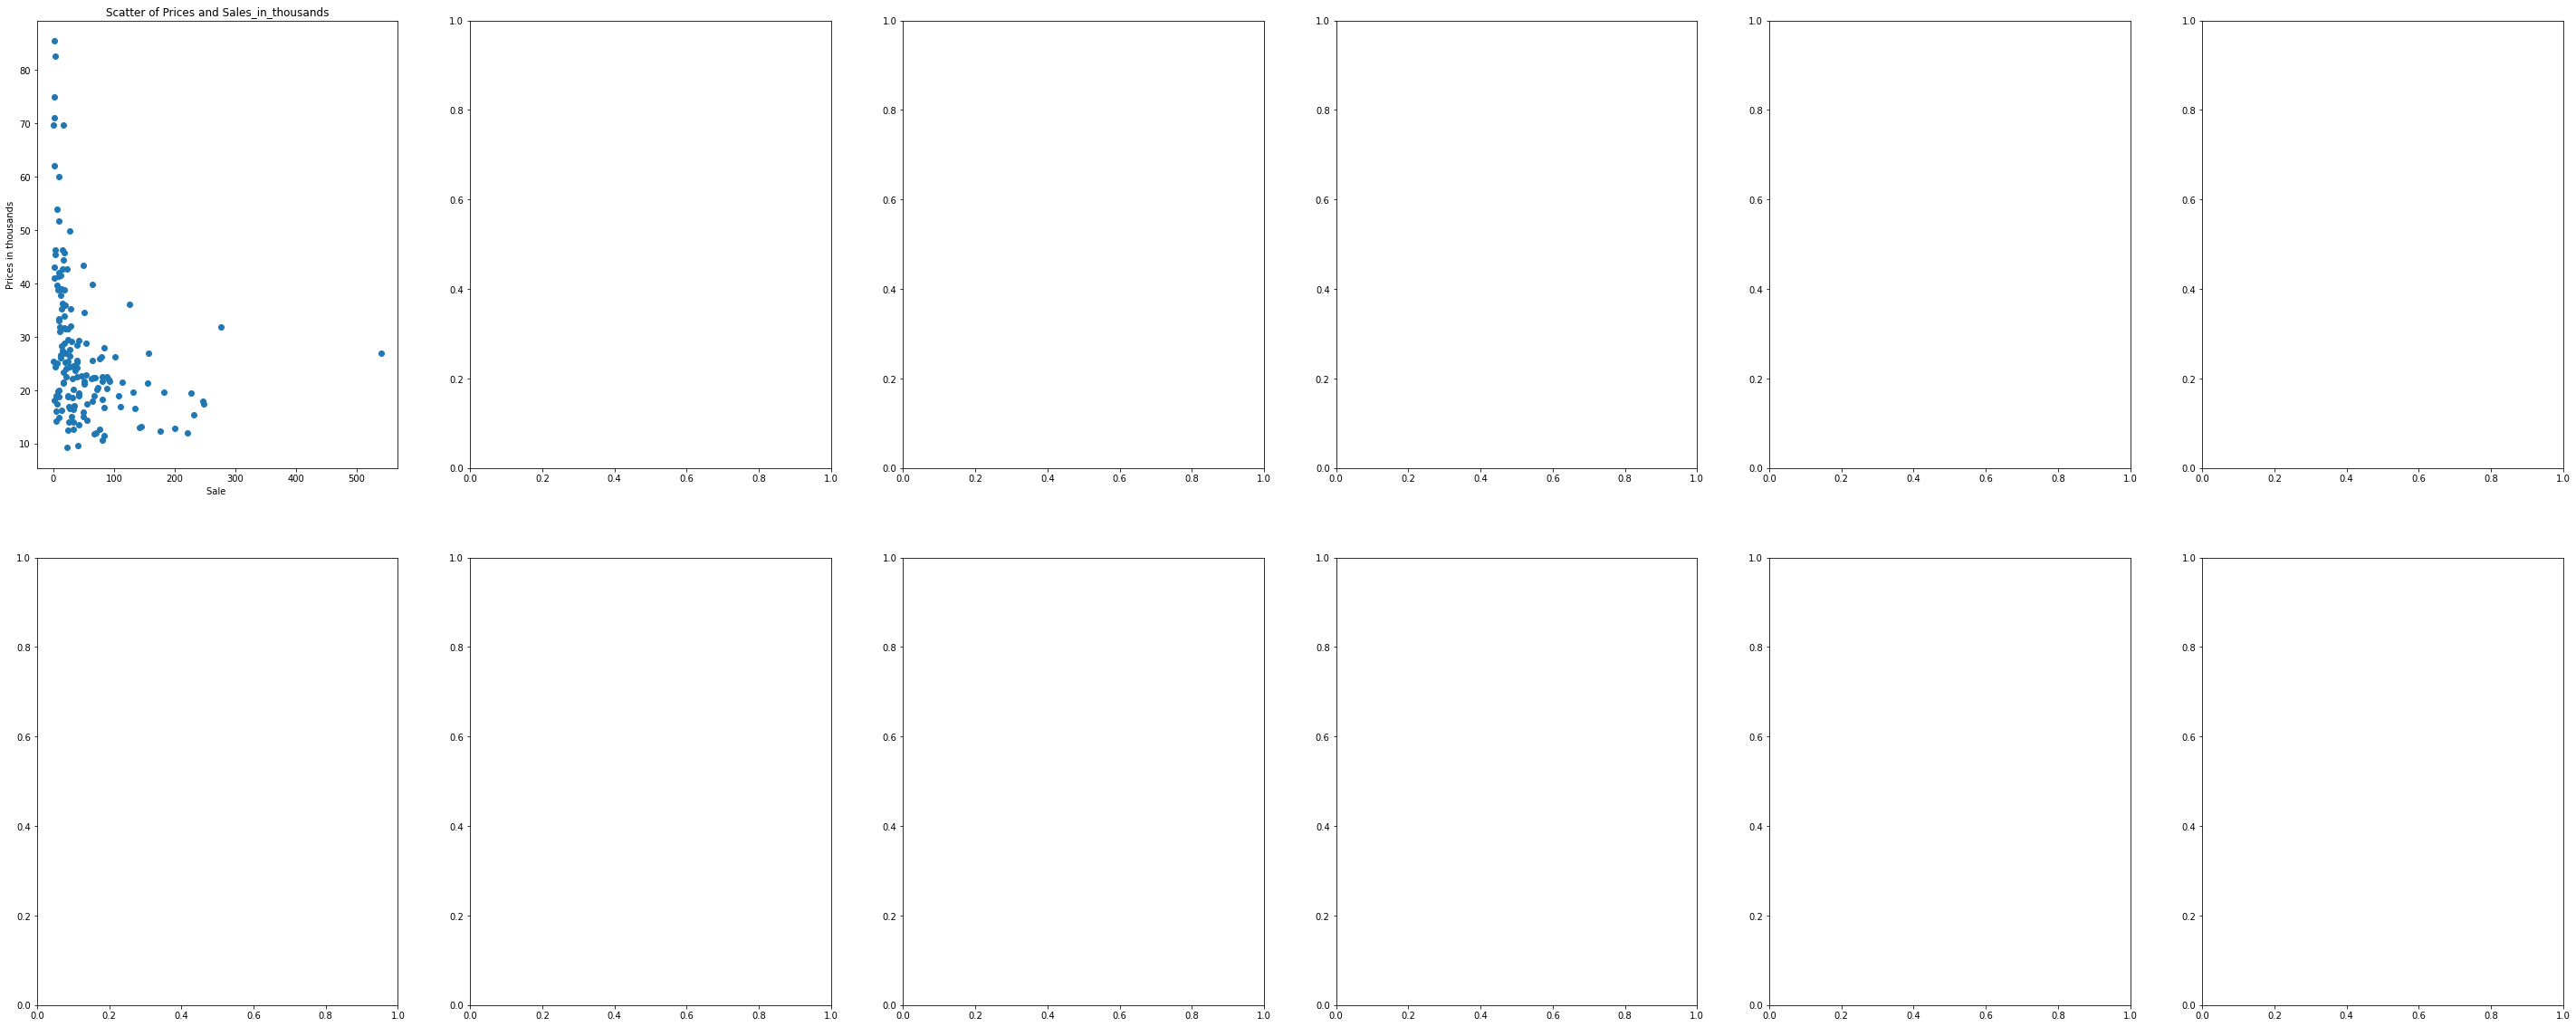

In [11]:
fig, ((ax1, ax2, ax3, ax4, ax5, ax6), (ax7, ax8, ax9, ax10, ax11, ax12)) = plt.subplots(ncols = 6, nrows = 2, figsize=(50,20))
ax1.scatter(sale, price)
ax1.set(xlabel = 'Sale ')
ax1.set(ylabel= 'Prices in thousands')
ax1.set(title = 'Scatter of Prices and Sales_in_thousands')

In [12]:
ax2.scatter(resale, price)
ax2.set(xlabel = 'Resale')
ax2.set(ylabel= 'Prices in thousands')
ax2.set(title = 'Scatter of Prices and__year_resale_value')

[Text(0.5, 1.0, 'Scatter of Prices and__year_resale_value')]

In [13]:
ax3.scatter(enginesize, price)
ax3.set(xlabel = 'Enginesize')
ax3.set(ylabel= 'Prices in thousands')
ax3.set(title = 'Scatter of Prices and Engine_size')

ax4.scatter(horsepower, price)
ax4.set(xlabel = 'Horsepower')
ax4.set(ylabel= 'Prices in thousands')
ax4.set(title = 'Scatter of Prices and Horsepower')

[Text(0.5, 1.0, 'Scatter of Prices and Horsepower')]

In [14]:
ax5.scatter(wheelbase, price)
ax5.set(xlabel = 'Wheelbase')
ax5.set(ylabel= 'Prices in thousands')
ax5.set(title = 'Scatter of Prices and Wheelbase')

ax6.scatter(width, price)
ax6.set(xlabel = 'Width')
ax6.set(ylabel= 'Prices in thousands')
ax6.set(title = 'Scatter of Prices and Width')

[Text(0.5, 1.0, 'Scatter of Prices and Width')]

In [15]:
ax7.scatter(length , price)
ax7.set(xlabel = 'Length')
ax7.set(ylabel= 'Prices in thousands')
ax7.set(title = 'Scatter of Prices and Length')

ax8.scatter(curbweight, price)
ax8.set(xlabel = 'Curbweight')
ax8.set(ylabel='Prices in thousands')
ax8.set(title = 'Scatter of Prices and Curb_weight')

[Text(0.5, 1.0, 'Scatter of Prices and Curb_weight')]

In [16]:
ax9.scatter(fuelcapacity, price)
ax9.set(xlabel = 'Fuelcapacity')
ax9.set(ylabel= 'Prices in thousands')
ax9.set(title = 'Scatter of Prices and Fuel_capacity')

ax10.scatter(fuelefficiency, price)
ax10.set(xlabel = 'Fuelefficiency')
ax10.set(ylabel= 'Prices in thousands')
ax10.set(title = 'Scatter of Prices and Fuel_efficiency')

ax11.scatter(power, price)
ax11.set(xlabel = 'Power')
ax11.set(ylabel= 'Prices in thousands')
ax11.set(title = 'Scatter of Prices and Power_perf_factor')

plt.show()

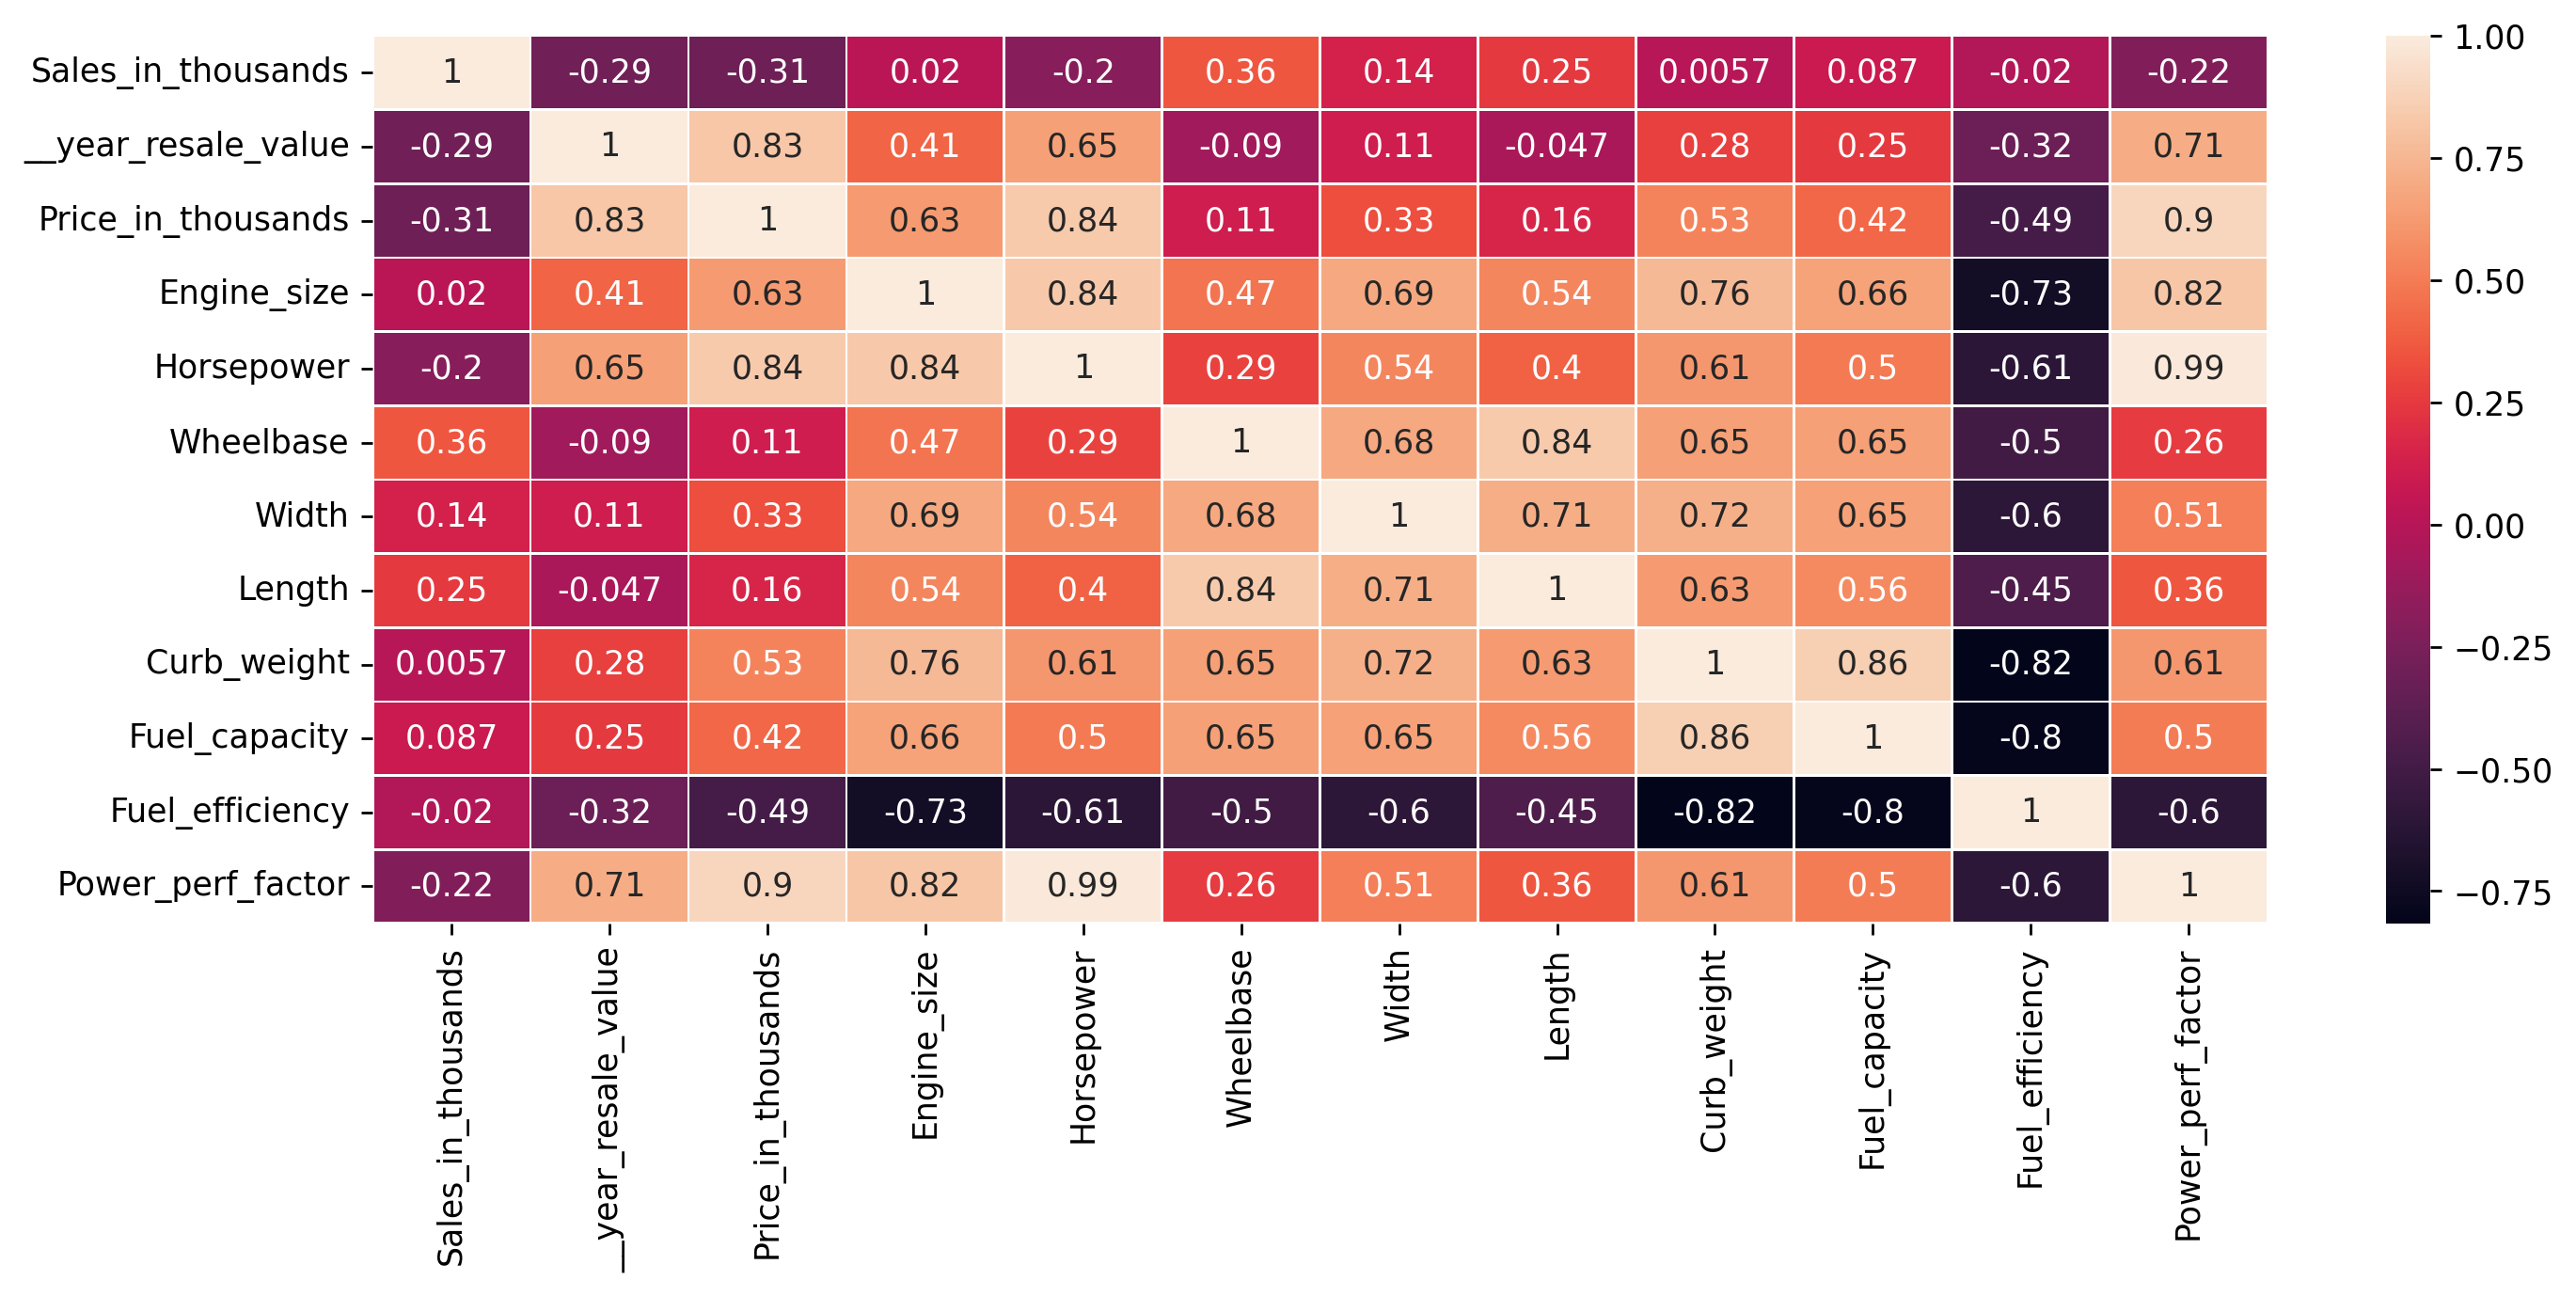

In [17]:
plt.rcParams['font.size'] = 10
plt.rcParams['figure.dpi'] = 250
plt.rcParams['figure.figsize'] = (13,5)
sns.heatmap(df.corr(), annot =True, linewidths=.5)
plt.show()

In [18]:
model = LinearRegression().fit(power, price)
#%% Get results
intercept = model.intercept_
slope = model.coef_
R_square = model.score(power, price)
print("R_square:",R_square)
print("Intercept:",intercept)
print("Coef:",slope)

R_square: 0.8028057065086073
Intercept: [-11.95889516]
Coef: [[0.5098694]]


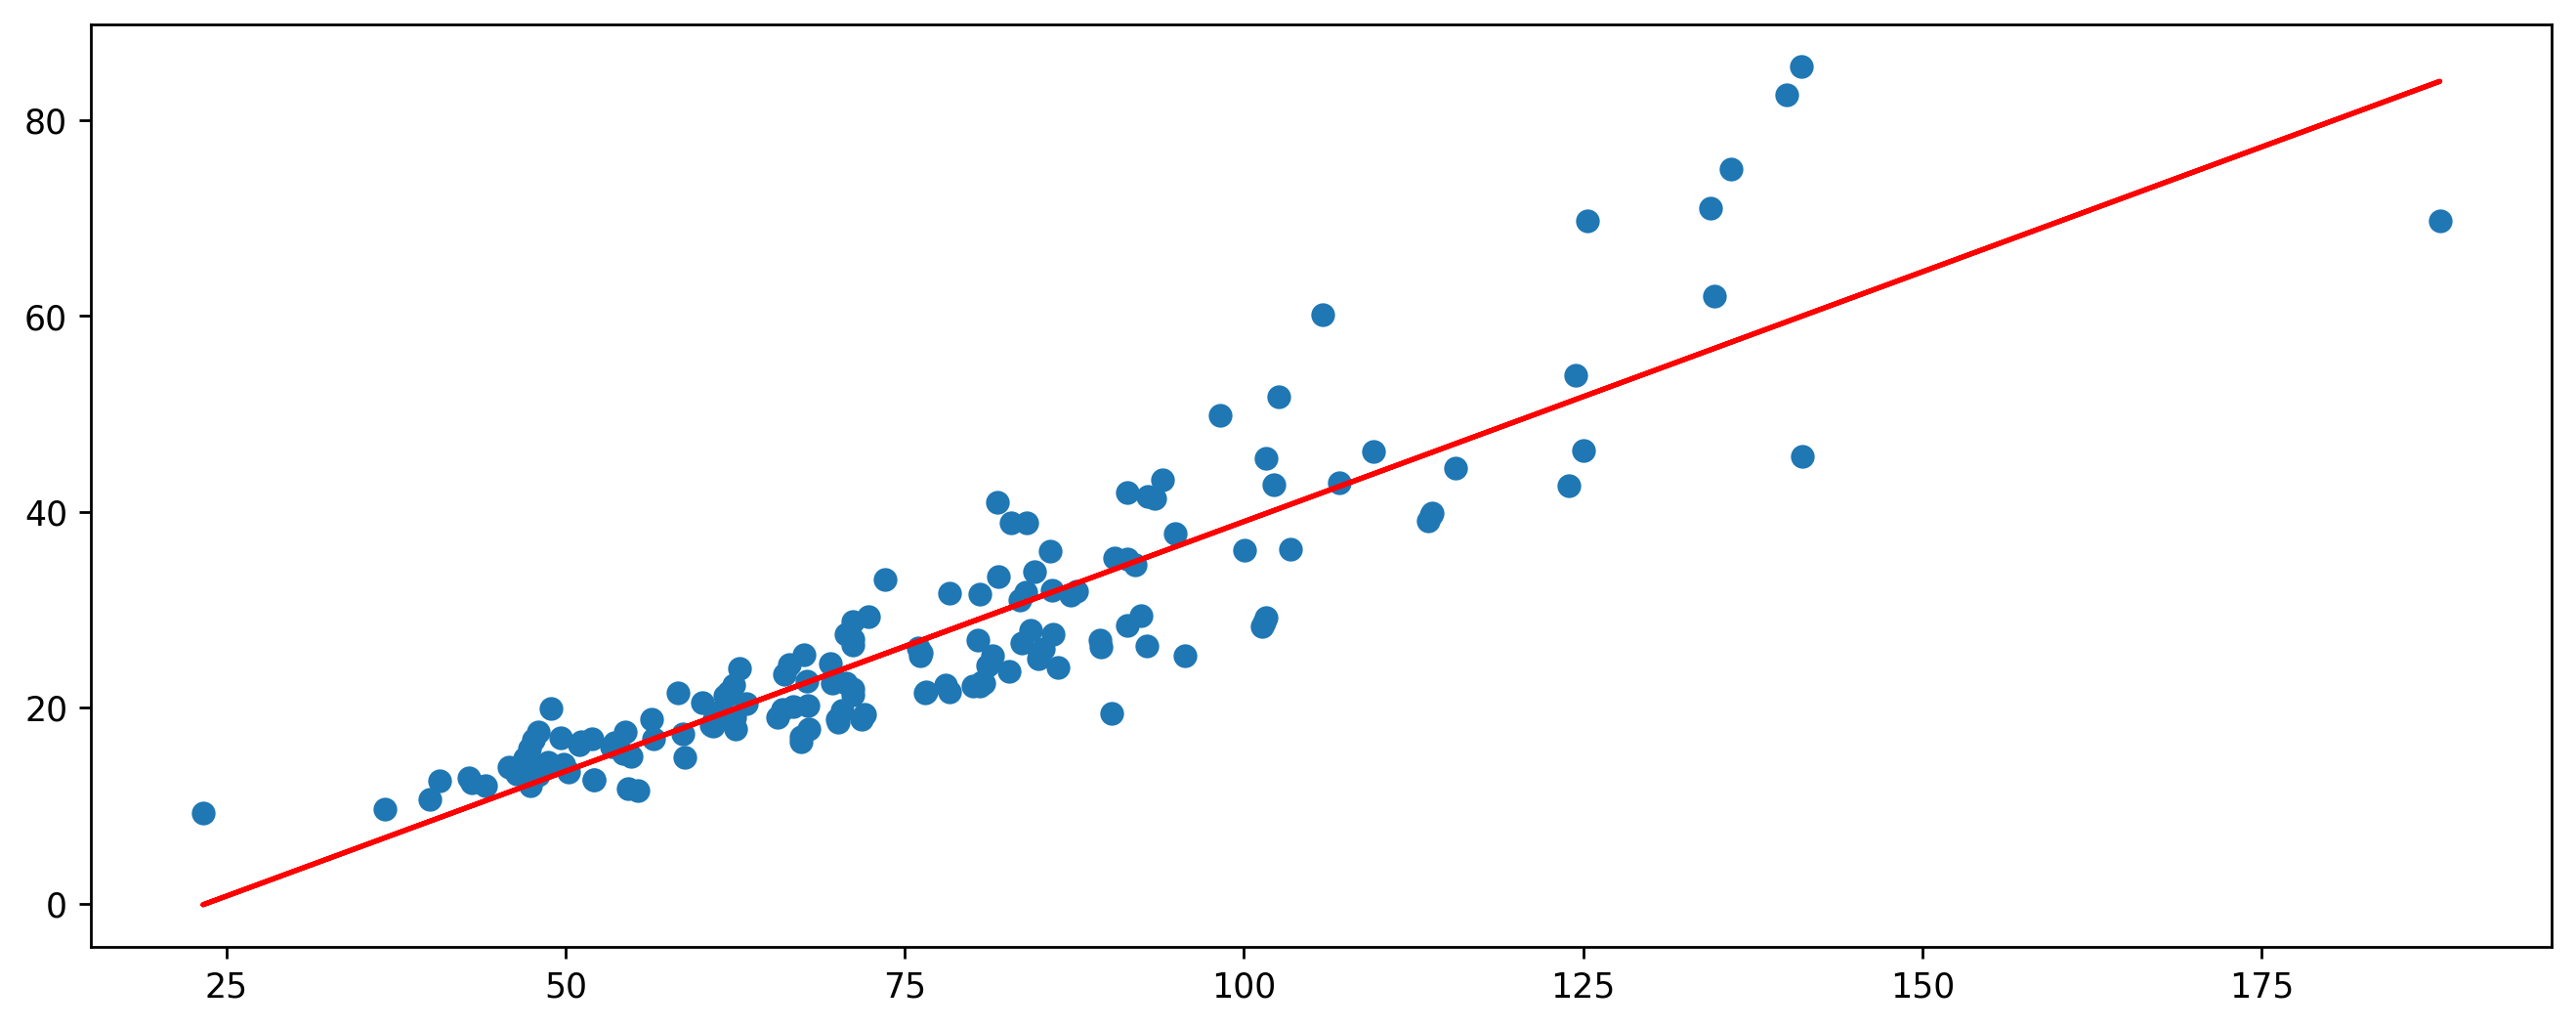

In [19]:
predictive_values = model.predict(power)
#%% Visualize
plt.scatter(power, price )
plt.plot(power, predictive_values, color='r')
plt.show()

In [20]:
future_values = np.array([200, 150, 300]).reshape(-1, 1)
f_predicted_values = model.predict(future_values)
print(f_predicted_values)

[[ 90.01498389]
 [ 64.52151413]
 [141.00192341]]
